# Deep Learning - Assignment 1 Report

#### Submitted By: Kalyani Prashant Kawale
#### Student ID: 21237189



### Assignment: Implement Shallow and Deep Neural Network

The given assignment has 5 parts, the solutions to each part are presented in following sections,


### Part 1 Solution: Implement Logistic Regression

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
import itertools
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Display plots inline and change default figure size
%matplotlib inline

Following section consists of two methods, LogisticRegressor and Predict. The LogisticRegressor implementation is based on material covered in [1],

In [3]:
def LogisticRegressor(X, y, alpha=0.01, max_iters=1000):
    '''
        Method to create a model for any data-set based on Logistic Regression, 
        using Stochastic Gradient Descent optimization.
        
        X: Input features for fixed number of samples
        y: Output labels for each sample in X
        alpha: Learning rate to control downhill step size for gradient descent
        max_iters: Number of iterations for training weights and biases
        
    '''
    # Getting the size of number of samples and number of features in X
    (nsamples, nattributes) = np.shape(X)
    # Initialising threshold to small value to check convergence
    threshold = 1e-6
    # Initialising weights and biases
    w = np.random.rand(nattributes)
    b = np.random.rand()
    # Initialising cost value to 0
    J_prev = 0
    # Running logistic regression for max_iters iterations
    for i in range(max_iters):
        # Randomly selecting a sample from X
        idx = np.random.choice(nsamples, 1, replace=False)
        random_X = X[idx[0]]
        random_y = y[idx[0]]
        # Calculating prediction for random sample using sigmoid function
        y_hat = 1 / (1 + np.exp(-1 * (np.dot(w, random_X) + b)))
        # Calculating cost
        J_curr = -1 * ((random_y * np.log(y_hat)) + ((1 - random_y) * np.log(1 - y_hat)))
        # Checking if convergence reached
        if np.absolute(J_curr - J_prev) < threshold:
            break
        else:
            J_prev = J_curr
        # Calculating gradients, derivatives of Cost w.r.t weights and bias
        delta_w = []
        for j in range(len(w)):
            delta_w.append((y_hat - random_y) * random_X[j])
        delta_b = (y_hat - random_y)
        # Updating weights and bias using the gradients
        for j in range(len(w)):
            w[j] -= alpha * delta_w[j]
        b -= alpha * delta_b        
    return w, b

def predict(data, weights, bias):
    '''
        Method to predict classes of new samples using LogisticRegressor
        
        data: Input data with fixed number of samples
        weights: Weights obtained using gradient descent ran on training data-set
        bias: Bias obtained using gradient descent ran in training data-set
    '''
    # Initialising predictions
    predictions = []
    # Calculating predictions for each sample using logistic regression
    for sample in data:
        prediction = 1 / (1 + np.exp(-1 * (np.dot(weights, sample) + bias))) 
        if prediction >= 0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Part 2 Solution: Easy Tasks

Following section performs training, validation and, testing on blobs300 and circles600 data-sets using LogisticRegressor defined in Part 1.

In [57]:
# Creating a list of file names for storing,
# names of files consisting blobs300 and circles600 data-sets
files = ["blobs300.csv", "circles600.csv"]

# Setting a list of different learning rates
alpha_s = [0.1, 0.001, 0.0001]

# Setting a list of different number of maximum iterations
iterations = [1000, 10000, 20000]

# Initialising dictionaries to store train, valid and test data-sets for both datasets
X_train = {}
y_train = {}
X_valid = {}
y_valid = {}
X_test = {}
y_test = {}
# Initialising dataframe to store results for different parameter configurations
results = pd.DataFrame(columns=['File Name', 'Learning Rate', 'Iterations', 'Accuracy'])
# Setting random seed to reproduce the same results
np.random.seed(200)

# Note: Reading of files into X and y is based on codes given in [2]
for file in files:
    # Using pandas to read the CSV file as a dataframe
    df = pd.read_csv(file).sample(frac=1).reset_index(drop=True)
    # Extracting labels from column named Class
    y = df['Class'].values
    # Removing Class column from dataframe
    del df['Class']
    # Setting X with dataframe values
    X = df.values
    
    # Splitting data into train (70%), validate (15%), and test data (15%),
    # the use of train_test_split is based on codes given in [3],[4]
    X_train[file], X_validate_test, y_train[file], y_validate_test = train_test_split(X, y, train_size=0.7)
    X_valid[file], X_test[file], y_valid[file], y_test[file] = \
        train_test_split(X_validate_test, y_validate_test, test_size=0.5)
    
    # Training and validating for different hyperparameters
    for alpha, iters in itertools.product(alpha_s, iterations):
        row = {'File Name': file, 'Learning Rate': alpha, 'Iterations': iters}
        # Getting trained weights and bias
        w, b = LogisticRegressor(X_train[file], y_train[file], alpha, iters)
        # Predicting on validation data using trained weights and bias
        predictions = predict(X_valid[file], w, b)
        # Using Scikit Learn accuracy_score method to calculate prediction accuracy
        accuracy = accuracy_score(y_valid[file], predictions)
        # Setting results for current pair of hyperparameters
        row['Accuracy'] = accuracy
        results = results.append(row, ignore_index=True)    

In [58]:
# Printing results for different hyperparameters
print("Training and Validation Results:\n")
print(results.to_markdown())

Training and Validation Results:

|    | File Name      |   Learning Rate |   Iterations |   Accuracy |
|---:|:---------------|----------------:|-------------:|-----------:|
|  0 | blobs300.csv   |          0.1    |         1000 |   1        |
|  1 | blobs300.csv   |          0.1    |        10000 |   1        |
|  2 | blobs300.csv   |          0.1    |        20000 |   1        |
|  3 | blobs300.csv   |          0.001  |         1000 |   0.933333 |
|  4 | blobs300.csv   |          0.001  |        10000 |   1        |
|  5 | blobs300.csv   |          0.001  |        20000 |   0.977778 |
|  6 | blobs300.csv   |          0.0001 |         1000 |   0.577778 |
|  7 | blobs300.csv   |          0.0001 |        10000 |   0.577778 |
|  8 | blobs300.csv   |          0.0001 |        20000 |   0.911111 |
|  9 | circles600.csv |          0.1    |         1000 |   0.655556 |
| 10 | circles600.csv |          0.1    |        10000 |   0.477778 |
| 11 | circles600.csv |          0.1    |        20000 |

Accuracy on Test data-set using alpha 0.1 and 1000 iterations:
100.0%


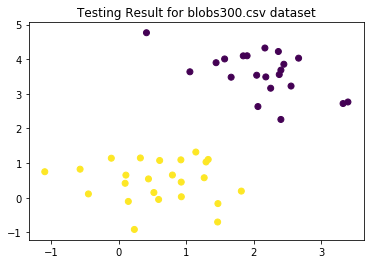

In [59]:
# Predicting class for samples in test data using,
# best alpha and best iterations for blobs300 data-set
np.random.seed(200)
file = 'blobs300.csv'
# Training logistic regressor for data-set using best alpha value and best iterations
w, b = LogisticRegressor(X_train[file], y_train[file], 0.1, 1000)
# Predicting classes for Test data-set
predictions = predict(X_test[file], w, b)
# Calculating and printing accuracy
print(f"Accuracy on Test data-set using alpha 0.1 and 1000 iterations:")
print(f"{round(accuracy_score(y_test[file], predictions), 4) * 100}%")
# Visualising the predictions for data-set
plt.scatter(X_test[file][:, 0], X_test[file][:, 1], c=predictions) 
plt.title(f"Testing Result for {file} dataset")
plt.show()    

Accuracy on Test data-set using alpha 0.0001 and 1000 iterations:
65.56%


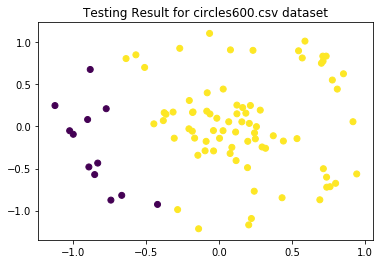

In [60]:
# Predicting class for samples in test data using,
# best alpha and best iterations for circles300 data-set
np.random.seed(200)
file = 'circles600.csv'
# Training logistic regressor for data-set using best alpha value and best iterations
w, b = LogisticRegressor(X_train[file], y_train[file], 0.0001, 1000)
# Predicting classes for Test data-set
predictions = predict(X_test[file], w, b)
# Calculating and printing accuracy
print(f"Accuracy on Test data-set using alpha 0.0001 and 1000 iterations:")
print(f"{round(accuracy_score(y_test[file], predictions), 4) * 100}%")
# Visualising the predictions for data-set
plt.scatter(X_test[file][:, 0], X_test[file][:, 1], c=predictions) 
plt.title(f"Testing Result for {file} dataset")
plt.show()

### Part 3 Solution: Implement and Test a Shallow Neural Network

Following sections contain different methods required to run the neural network for different datasets.

> #### Part 3.1: Sigmoid Function and First-order Derviative of Sigmoid Function
f() and f_dash() methods calculate sigmoid function and first-order derivative of sigmoid function for activations.

In [23]:
# Part 3.1: Sigmoid Function and First-order Derviative of Sigmoid Function
def f(z):
    '''
        Method to calculate sigmoid value of z
    '''
    return 1 / (1 + np.exp(-z))

def f_dash(z):
    '''
        Method to calculate first-order derivative of z using sigmoid
    '''
    return f(z) * (1 - f(z))

> #### Part 3.2: Forward Propagation
ForwardPropagation() method performs the forward pass of the neural network. The method is configured to work for both shallow and deep neural network.

In [26]:
# Part 3.2: Forward Propagation
def ForwardPropagation(x, weights, biases):
    '''
        Method to perform forward propogation step of neural network, 
        to calculate sigma and activation values for each neuron
        in all hidden and output layers
        
        x: numpy array of all features for a single sample
        weights: initialised, updated, or trained weights for each layer, 
                 depending on the phase of calculations
        biases: initialised, updated, or trained biases for each layer, 
                 depending on the phase of calculations
    '''
    sigmas = []
    activations = []
    # Initialising activations with input values
    activations.append(x)
    # Calculating sigma and activation values for each neuron in all layers
    for layer in range(len(weights)):
        # Initialising sigma and activations for current layer
        sigma_layer = np.zeros(weights[layer].shape[0])
        activations_layer = np.zeros(weights[layer].shape[0])
        # For each neuron in layer calculating the sigma value
        for i in range(weights[layer].shape[0]):            
            sigma = 0
            # Summing the product of all weights and activations 
            # in previous layer for a single neuron
            for j in range(weights[layer].shape[1]):
                sigma += weights[layer][i][j] * activations[layer][j]
            # Adding bias of the neuron to the sum calculated in sigma    
            sigma_layer[i] = sigma + biases[layer][i]
            # Applying sigmoid function on sigma of the neuron
            # to calculate the actiation of the neuron
            activations_layer[i] = f(sigma_layer[i])
        # appending all sigma values for current layer to list of sigmas
        sigmas.append(sigma_layer)
        # appending all activation values for current layer to list of activations
        activations.append(activations_layer)
            
    return sigmas, activations

> #### Part 3.3: Back Propagation
BackPropagation() method performs the backward pass of the neural network to propogate the errors in predictions back to all layers. The method is configured to work for both shallow and deep neural network.

In [25]:
# Part 3.3: Back Propagation
def BackPropagation(y, activations, sigmas, weights):
    '''
        Method to perform backward propogation step of neural network, 
        to calculate weight and bias gradient values for each neuron
        in all hidden and output layers
        
        y: actual class value for the current sample
        activations: activations of each neuron in all layers
        sigmas: sigma values of each neuron in all layers
        weights: current weights of each neuron in all layers
    '''
    # Initialising list of weight and bias gradients
    delta_weights = []
    delta_biases = []
    
    # Initialising list of delta sigmas with the delta sigma of output layer
    delta_sigmas = [np.array(activations[len(activations)-1] - y)]
    
    # Calculating the weight gradients for output layer
    for i in range(weights[len(weights) - 1].shape[0]):
        delta_weight = []
        for j in range(weights[len(weights) - 1].shape[1]):
            delta_weight.append(delta_sigmas[i][0] * activations[len(activations)-2][j])
        delta_weights.append(np.array([delta_weight]))
    
    # Reversing the weights and sigma lists for 
    # calculating deltas for hidden layers
    reversed_weights = list(reversed(weights))
    hidden_weights = reversed_weights[1:]
    hidden_sigmas = list(reversed(sigmas))[1:]
    
    # Calculating the gradients of sigma for each neuron in each hidden layer
    for layer in range(len(hidden_weights)):        
        delta_sigma_layer = []
        for i in range(hidden_sigmas[layer].shape[0]):
            # Calculating the first-order derivative of sigma 
            # value of neuron in current hidden layer
            delta_sigma = f_dash(hidden_sigmas[layer][i])
            summation = 0
            # Calculating sum of product of delta sigma values and weights of the next layer
            for j in range(len(delta_sigmas[0])):
                summation += delta_sigmas[0][j] * reversed_weights[layer][j][i]
            # Multiplying the sum with the first-order derivative of sigma
            delta_sigma = delta_sigma * summation
            # Appending the gradient sigma to list of sigmas for current layer
            delta_sigma_layer.append(delta_sigma)
        # Inserting the delta sigmas calculated for 
        # current hidden layer at the beginning of delta_sigmas list,
        # to be able to use it as the next layer delta sigmas 
        # for next hidden layer in the reverse order
        delta_sigmas.insert(0, np.array(delta_sigma_layer))
    
    # Calculating the hidden layer weight gradients
    hidden_delta_weights = []
    for layer in range(len(weights)-1):
        layer_delta_weights = np.zeros(weights[layer].shape)
        for i in range(weights[layer].shape[0]):
            # Calculating weight gradient for a neuron in current layer
            # by multiplying delta sigma for the neuron with activations from previous layer,
            # NOTE: activations list starts with input values in first position,
            # thus, activations[layer] consists of activations of previous layer for current layer
            for j in range(len(weights[layer][i])):
                layer_delta_weights[i][j] = delta_sigmas[layer][i] * activations[layer][j]
        hidden_delta_weights.append(np.array(layer_delta_weights))
    
    # Combining the delta weights for all hidden and output layers
    delta_weights = hidden_delta_weights + delta_weights
    # Setting the delta bias values for all hidden and output layers
    delta_biases = delta_sigmas
                
    return delta_weights, delta_biases

> #### Part 3.4: Weight and Bias Update
SGD_Parameter_Update() method updates the current weights and biases for all neurons in each layer. The method is configured to work for both shallow and deep neural network.

In [35]:
# Part 3.4: Weight and Bias Update
def SGD_Parameter_Update(alpha, weights, biases, delta_weights, delta_biases): 
    '''
        Method to update weights and biases using the weight and bias gradients
        
        alpha: Learning rate
        weights: current weights for each neuron in all layers
        biases: current biases for each neuron in all layers
        delta_weights: weight gradients for each neuron in all layers
        delta_biases: bias gradients for each neuron in all layers
    '''
    # Updating weights using gradient descent update
    for layer in range(len(weights)):
        for i in range(weights[layer].shape[0]):    
            for j in range(weights[layer].shape[1]):
                weights[layer][i][j] -= alpha * delta_weights[layer][i][j]
    
    # Updating biases using gradient descent update
    for layer in range(len(biases)):
        for i in range(biases[layer].shape[0]):
            biases[layer][i] -= alpha * delta_biases[layer][i]
    
    return weights, biases

> #### Part 3.5: Prediction function for neural network
PredictNN() function calculates predictions for test data-set.

In [36]:
# Part 3.5: Prediction function for neural network
def predictNN(data, weights, biases):
    '''
        Method to calculate predictions for test-data set
        data: fixed number of samples 
        weights: trained weights for each neuron in all layers
        biases: trained biases for each neuron in all layers
    '''
    predictions = []
    for sample in data:
        # Performing the forward pass on sample using trained weights and biases
        sigmas, activations = ForwardPropagation(sample, weights, biases)
        # Getting the activation in output neuron
        prediction = activations[len(activations) - 1][0]
        if prediction > 0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

> #### Part 3.6: Implementing neural network for a given configuration
Stochastic_NN() function runs the neural network using stochastic gradient descent. Method is configured to support single hidden layer with different number of neurons and one output layer with single neuron (shallow network).

In [39]:
# Part 3.6: Implementing neural network for a given configuration
def Stochastic_NN(X, y, alpha, epochs, layers=2, hidden_layer_neurons=3):
    '''
        Method to run shallow neural network using stochastic gradient descent
        
        X: training data-set of fixed samples
        y: labels for each sample of X
        epochs: total number of epochs
        layers: total number of layers of neural network, including output layer
        hidden_layer_neurons: number of neurons in hidden layer
    '''
    # Getting number of samples and number of features in training data-set X
    (nsamples, nattributes) = np.shape(X)
    # Initialising threshold to small value to check convergence
    threshold = 1e-6
    # Setting the number of neurons in hidden and output layers
    layer_neurons = []
    layer_neurons.append(hidden_layer_neurons)    
    layer_neurons.append(1)
    # Setting the number of neurons for input layer
    layer_neurons.insert(0, nattributes)
    # Initialising weights and biases for each layer to small random values
    weights = []
    biases = []
    for i in range(1, layers + 1):
        weights.append(np.random.rand(layer_neurons[i], layer_neurons[i - 1]))
        biases.append(np.array(np.random.rand(layer_neurons[i])))
    
    # Initialising cost value to 0
    J_prev = 0
    
    for epoch in range(epochs):
        # Randomly selecting a sample from X
        idx = np.random.choice(nsamples, 1, replace=False)
        random_X = X[idx[0]]
        random_y = y[idx[0]]
        # Implementing forward pass
        sigmas, activations = ForwardPropagation(random_X, weights, biases)
        # Getting the activation in output neuron
        y_hat = activations[len(activations)-1][0]
        # Calculating cost
        J_curr = -1 * ((random_y * np.log(y_hat)) + ((1 - random_y) * np.log(1 - y_hat)))        
        # Checking if convergence reached
        if np.absolute(J_curr - J_prev) < threshold:
            break
        else:
            J_prev = J_curr        
        # Implementing backward pass
        delta_weights, delta_biases = BackPropagation(random_y, activations, sigmas, weights)
        # Updating weights and biases
        weights, biases = SGD_Parameter_Update(alpha, weights, biases, delta_weights, delta_biases)
        # Printing loss in intervals of epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch} ==> Loss: {J_curr}, Error: {random_y - y_hat}")
    return weights, biases

> #### Part 3.7: Testing Shallow Network on blobs300 Data-Set.
The best parameters found for the given data-set for neural network with one hidden layer, after testing with different hyperparameters are,
> 1. alpha: 0.1
> 2. epochs: 1000
> 3. number of neurons in hidden layer: 3

> The neural network is able to handle linearly separable data as we get 99% accuracy on training data and 100% accuracy on test data.

Epoch 0 ==> Loss: 1.483827904777161, Error: -0.7732320213659832
Epoch 100 ==> Loss: 0.7303865490027355, Error: 0.5182772553505124
Epoch 200 ==> Loss: 0.40916261175407, Error: -0.33579378419773886
Epoch 300 ==> Loss: 0.21466863958574298, Error: -0.19319125963303552
Epoch 400 ==> Loss: 0.1522224633927398, Error: -0.1412027914520617
Epoch 500 ==> Loss: 0.145795564586872, Error: -0.13566561431883475
Epoch 600 ==> Loss: 0.11590567411542381, Error: -0.10944077787782727
Epoch 700 ==> Loss: 0.05489518354632233, Error: 0.053415639630393086
Epoch 800 ==> Loss: 0.08879516656372713, Error: -0.08496701626977587
Epoch 900 ==> Loss: 0.04806153973362341, Error: 0.04692486671707152

EVALUATION ON TRAINING DATA:
Training Accuracy: 99.0%

PREDICTIONS FOR TESTING DATA:
Testing Accuracy: 100.0%


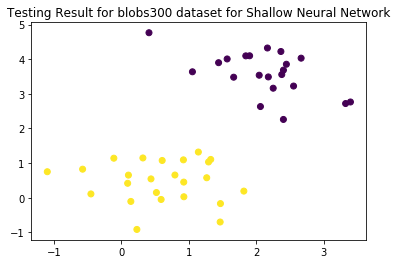

In [63]:
# Part 3.7: Testing shallow network on blobs300 data-set.
np.random.seed(200)
file = 'blobs300.csv'
# Training shallow neural network for blobs300 data-set, using the train data calculated in Part 2
# with best parameters found.
w_300, b_300 = Stochastic_NN(X_train[file], y_train[file], 0.1, 1000)

# Evaluating the model on training data
print("\nEVALUATION ON TRAINING DATA:")
training_predictions_300 = predictNN(X_train[file], w_300, b_300)
print(f"Training Accuracy: {round(accuracy_score(y_train[file], training_predictions_300), 2) * 100}%")

# Using the model to predict classes of test data, using the test data calculated in Part 2
print("\nPREDICTIONS FOR TESTING DATA:")
predictions_300 = predictNN(X_test[file], w_300, b_300)
print(f"Testing Accuracy: {round(accuracy_score(y_test[file], predictions_300), 4) * 100}%")

plt.figure()
plt.scatter(X_test[file][:, 0], X_test[file][:, 1], c=predictions_300) 
plt.title(f"Testing Result for blobs300 dataset for Shallow Neural Network")
plt.show()

> #### Part 3.8: Testing Shallow Network on circles600 Data-Set.
The best parameters found for the given data-set for neural network with one hidden layer, after testing with different hyperparameters are,
> 1. alpha: 0.5
> 2. epochs: 5000
> 3. number of neurons in hidden layer: 3

> The neural network increases the accuracy from 65.56% in Part 2 to 97.78% for random seed 200, the data-set also gives 100% accuracy for different splits of the data.

Epoch 0 ==> Loss: 2.9354313213618783, Error: -0.946892192166351
Epoch 500 ==> Loss: 1.0372935486156112, Error: -0.645587414452878
Epoch 1000 ==> Loss: 0.4116173690166781, Error: -0.3374222496683901
Epoch 1500 ==> Loss: 1.6551694923612907, Error: -0.808940330193622
Epoch 2000 ==> Loss: 0.1008993101048937, Error: -0.0959759456094755
Epoch 2500 ==> Loss: 0.3526855111393095, Error: 0.2972018191744421
Epoch 3000 ==> Loss: 0.3068637662715999, Error: 0.26424917184157426
Epoch 3500 ==> Loss: 1.387013142916528, Error: -0.7501796308837209
Epoch 4000 ==> Loss: 0.1859814281851733, Error: 0.16971098518741912
Epoch 4500 ==> Loss: 0.011382931525052572, Error: 0.0113183910786121

EVALUATION ON TRAINING DATA:
Training Accuracy: 99.52%

PREDICTIONS FOR TESTING DATA:
Accuracy: 97.78%


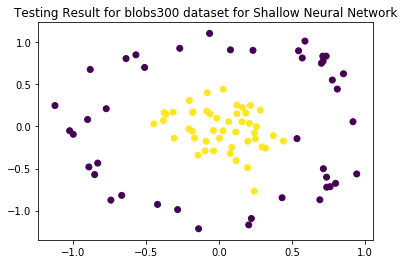

In [78]:
# Part 3.8: Testing Shallow Network on circles600 Data-Set.
np.random.seed(200)

file = 'circles600.csv'
# Training shallow neural network for circles600 data-set, using the train data calculated in Part 2
# with best parameters found.
w_600, b_600 = Stochastic_NN(X_train[file], y_train[file], 0.5, 5000)

# Evaluating the model on training data
print("\nEVALUATION ON TRAINING DATA:")
training_predictions_600 = predictNN(X_train[file], w_600, b_600)
print(f"Training Accuracy: {round(accuracy_score(y_train[file], training_predictions_600), 4) * 100}%")

# Using the model to predict classes of test data, using the test data calculated in Part 2
print("\nPREDICTIONS FOR TESTING DATA:")
predictions_600 = predictNN(X_test[file], w_600, b_600)
print(f"Accuracy: {round(accuracy_score(y_test[file], predictions_600), 4) * 100}%")

plt.figure()
plt.scatter(X_test[file][:, 0], X_test[file][:, 1], c=predictions_600) 
plt.title(f"Testing Result for blobs300 dataset for Shallow Neural Network")
plt.show()

### Part 4 Solution: Challenging Task

Following section contains solutions for loading CIFAR-10 data set, converting it into grayscale 1-dimensional vector consisting of **dog** and **deer** images and classification between the classes of **dog** and **deer** using shallow neural network with **one hidden layer**. The code used for loading and visualising the CIFAR-10 dataset is based on [4], [5].

In [79]:
# unpickle is taken from [5]
def unpickle(file):
    '''
        Method to load CIFAR-10 data-set
    '''
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [98]:
# loadbatch is taken from [4]
def loadbatch(batchname):
    '''
        Method to load batch from data-set
    '''
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

# loadlabelnames is taken from [4]
def loadlabelnames():
    '''
        Method to load names of available labels for CIFAR-10 data-set
    '''
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

# visualise is taken from [4]
def visualise(data):    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = data.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()
    

In [149]:
# Following code is based on [4]

# Loading data from all five batches
batch1 = loadbatch('data_batch_1')
batch2 = loadbatch('data_batch_2')
batch3 = loadbatch('data_batch_3')
batch4 = loadbatch('data_batch_4')
batch5 = loadbatch('data_batch_5')
# Loading test data from test_batch
test_batch = loadbatch('test_batch')

# Getting data (RGB features) from batches
train_data = np.concatenate((batch3[b'data'], batch4[b'data'], batch5[b'data']))
# Getting labels (RGB features) from batches
train_labels = np.concatenate((batch3[b'labels'], batch4[b'labels'], batch5[b'labels']))
# Getting test data from test batch
test_data = test_batch[b'data']
# Getting test labels from test batch
test_labels = test_batch[b'labels']

# Loading label names
names = loadlabelnames()

In [150]:
# Following code is based on [4]
def extract_images(data, labels):
    # initialising data set and labels for storing dog and deer images
    X = []
    y = []
    dogs_deer = []
    # Extracting dog (label: 5) and deer (label: 4) images from the data-set of all images
    for i in range(len(labels)):
        if labels[i] == 4 or labels[i] == 5:
            picture = data[i]
            picture.shape = (3,32,32)
            dogs_deer.append((picture, labels[i]))
    for picture, label in dogs_deer:
            # Converting the images into 2D grayscale by taking mean over each color channel
            gray_picture = np.mean(picture, axis=0)
            # Converting the image into 1D vector using flatten() and saving in the data-set
            X.append(gray_picture.flatten())
            # Saving corresponding label of image in y (class 0 for deer and class 1 for dog)
            if label == 4:
                y.append(0)
            elif label == 5:
                y.append(1)
    # Visualing few images from dogs_deer
    visualise(dogs_deer[1][0])
    visualise(dogs_deer[7][0])
    
    return np.array(X), np.array(y)

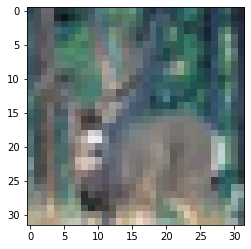

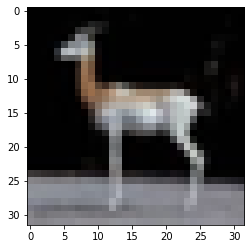

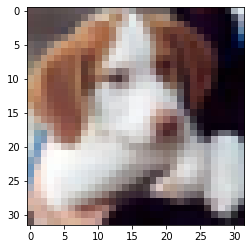

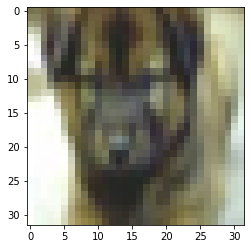

size of data: 6066 , size of labels: 6066
size of test data: 2000 , size of labels: 2000


In [151]:
# extracting dog and deer images for train and test data-sets
dd_X, dd_y = extract_images(train_data, train_labels)
dd_X_test, dd_y_test = extract_images(test_data, test_labels)

assert len(dd_X) == len(dd_y)
assert len(dd_X_test) == len(dd_y_test)

print("size of data:", len(dd_X), ", size of labels:", len(dd_y))
print("size of test data:", len(dd_X_test), ", size of labels:", len(dd_y_test))


In [181]:
from sklearn import preprocessing

# Normalising image data using sklearn standard scalar function
scalar = preprocessing.StandardScaler().fit(dd_X)
dd_X_train = scalar.transform(dd_X)
dd_y_train = dd_y
dd_X_test = scalar.transform(dd_X_test)
dd_y_test = dd_y_test

# Training neural network for image classification with single hidden layer
ddweights, ddbiases = Stochastic_NN(dd_X_train, dd_y_train, 0.05, 2000)

# Evaluating the model on training data
print("\nEVALUATION ON TRAINING DATA:")
training_predictions = predictNN(dd_X_train, ddweights, ddbiases)
print(f"Training Accuracy: {round(accuracy_score(dd_y_train, training_predictions)) * 100}%")

# Using the model to predict classes of test data
print("\nPREDICTIONS FOR TESTING DATA:")
ddpredictions = predictNN(dd_X_test, ddweights, ddbiases)
print(f"Accuracy: {accuracy_score(dd_y_test, ddpredictions) * 100}%")

Epoch 0 ==> Loss: 0.10176522676557169, Error: 0.09675841627374149
Epoch 200 ==> Loss: 0.7590794019820655, Error: -0.5319028419696895
Epoch 400 ==> Loss: 0.9297101479484018, Error: -0.605331910850321
Epoch 600 ==> Loss: 0.523586848374442, Error: 0.4076080872627931
Epoch 800 ==> Loss: 1.007723418088607, Error: 0.6349509015294933
Epoch 1000 ==> Loss: 0.6765311692001913, Error: -0.49162258747297755
Epoch 1200 ==> Loss: 0.749614066521602, Error: -0.5274511100094458
Epoch 1400 ==> Loss: 0.5640561273221085, Error: -0.43110314037427294
Epoch 1600 ==> Loss: 1.1366972063297625, Error: -0.6791229356565387
Epoch 1800 ==> Loss: 0.8384665076047759, Error: -0.567626943901733

EVALUATION ON TRAINING DATA:
Training Accuracy: 100.0%

PREDICTIONS FOR TESTING DATA:
Accuracy: 50.0%


- From above results it can be seen that running the shallow neural network with one hidden layer consisting of 3 neurons, provides 100% accuracy on training data, however, very low accuracy on the testing data, which could mean the neural network is overfitting the model.
- However, the changes in the loss could be an indication that the data-set consists of saddle points.
- Further, it was found that increasing the number of neurons does not affect the accuracy.
- Reducing the learning rate and epochs from the set 0.05 alpha and 2000 epochs reduces the performance on training data as well.

### Part 5 Solution: Deep Learning Enhancements

The following section contains enhancement to Part 3 neural network architecture. 

> #### Part 5.1: Implementing Enhacements to Part 3 Architecture
> - The Enhanced_NN() provides support for mutliple hidden layers, multiple neurons in the hidden layers.
> - Further the Part 3 architecture has been updated to perform back propagation with momentum.

In [167]:
# Part 5.1: Implementing Enhacements to Part 3 Architecture
def Enhanced_NN(X, y, alpha, epochs, layers=2, hidden_layer_neurons=[3], beta=0.9):
    '''
       Method to run deep neural network using Backprop with Momentum
       
       X: training data-set of fixed samples
       y: labels for each sample of X
       epochs: total number of epochs
       layers: total number of layers of neural network, including output layer
       hidden_layer_neurons: array of number of neurons for all hidden layers
       beta: momentum set to default value of 0.9
    '''
    # Getting number of samples and number of features in training data-set X
    (nsamples, nattributes) = np.shape(X)
    # Initialising threshold to small value to check convergence
    threshold = 1e-6
    
    # Setting the number of neurons in hidden and output layers    
    layer_neurons = []
    for layer in range(layers-1):
        layer_neurons.append(hidden_layer_neurons[layer])
    layer_neurons.append(1)
    # Setting the number of neurons for input layer
    layer_neurons.insert(0, nattributes)
    
    # Initialising weights and biases for each layer to small random values
    weights = []
    biases = []
    for i in range(1, layers + 1):
        weights.append(np.random.rand(layer_neurons[i], layer_neurons[i - 1]))
        biases.append(np.array(np.random.rand(layer_neurons[i])))
    
    # Initialising cost value to 0
    J_prev = 0
    V_w = weights
    V_b = biases
    for epoch in range(epochs):
        # Randomly selecting a sample from X
        idx = np.random.choice(nsamples, 1, replace=False)
        random_X = X[idx[0]]
        random_y = y[idx[0]]
        
        # Performing the forward pass, implemented in Part 3.2
        sigmas, activations = ForwardPropagation(random_X, weights, biases)
        
        # Getting the activation value of output neuron
        y_hat = activations[len(activations)-1][0]
        
        # Calculating the cost
        J_curr = -1 * ((random_y * np.log(y_hat)) + ((1 - random_y) * np.log(1 - y_hat)))        
        # Checking if convergence has reached
        if np.absolute(J_curr - J_prev) < threshold:
            break
        else:
            J_prev = J_curr
        
        # Performing the backward pass, implemented in Part 3.3
        delta_weights, delta_biases = BackPropagation(random_y, activations, sigmas, weights)
        
        # Setting the exponentially weighted moving average of gradients of weights and biases (V_w and V_b)
        if epoch == 1:
            # Initialising V_w and V_b with gradients for first iteration
            V_w = delta_weights
            V_b = delta_biases
        else:
            # Calculating V_w and V_b using momentum beta and gradients of weights and biases
            for layer in range(len(delta_weights)):
                for i in range(delta_weights[layer].shape[0]):
                    for j in range(delta_weights[layer].shape[1]):
                        V_w[layer][i][j] = ((1-beta) * delta_weights[layer][i][j]) + (beta * V_w[layer][i][j])
            
            for layer in range(len(delta_biases)):
                for i in range(delta_biases[layer].shape[0]):
                    V_b[layer][i] = ((1-beta) * delta_biases[layer][i]) + (beta * V_b[layer][i])
        
        # Updating the weights and biases using V_w and V_b, implemented in Part 3.4
        weights, biases = SGD_Parameter_Update(alpha, weights, biases, V_w, V_b)
        # Printing loss in intervals of epochs
        if epoch % (epochs/10) == 0:
            print(f"Epoch {epoch} ==> Loss: {J_curr}, Error: {random_y - y_hat}")
    return weights, biases

> #### Part 5.2: Testing Enhanced_NN on CIFAR-10 Data
> Using the same data-set loaded and converted into gray-scale 1D vector, the Enhanced_NN is tested.

In [197]:
# Part 5.2: Testing Enhanced_NN on CIFAR-10 Data
# Training neural network for image classification with 2 hidden layers, with 4 and 8 neurons respectively
ddweights_enhanced, ddbiases_enhanced = \
    Enhanced_NN(dd_X_train, dd_y_train, 0.05, 1000, layers=3, hidden_layer_neurons=[4, 8])

# Evaluating the model on training data
print("\nEVALUATION ON TRAINING DATA:")
training_predictions_enhanced = predictNN(dd_X_train, ddweights_enhanced, ddbiases_enhanced)
print(f"Training Accuracy: {round(accuracy_score(dd_y_train, training_predictions_enhanced)) * 100}%")

# Using the model to predict classes of test data
print("\nPREDICTIONS FOR TESTING DATA:")
ddpredictions_enhanced = predictNN(dd_X_test, ddweights_enhanced, ddbiases_enhanced)
print(f"Accuracy: {accuracy_score(dd_y_test, ddpredictions_enhanced) * 100}%")

Epoch 0 ==> Loss: 0.003472512824039907, Error: 0.003466490624122187
Epoch 100 ==> Loss: 0.7067223724048205, Error: -0.506741732234717
Epoch 200 ==> Loss: 0.9252069864453678, Error: -0.6035506490601293
Epoch 300 ==> Loss: 0.5239163001206281, Error: -0.40780321966775007
Epoch 400 ==> Loss: 0.4456808560035204, Error: 0.3596118845251034
Epoch 500 ==> Loss: 0.6000236114229988, Error: -0.4512013219766802
Epoch 600 ==> Loss: 0.8180753288764381, Error: -0.5587198431245959
Epoch 700 ==> Loss: 0.4863975531645456, Error: 0.3851626718054796
Epoch 800 ==> Loss: 1.1471829241990217, Error: -0.6824699832581921
Epoch 900 ==> Loss: 0.7413368098717807, Error: -0.5235234689453543

EVALUATION ON TRAINING DATA:
Training Accuracy: 100.0%

PREDICTIONS FOR TESTING DATA:
Accuracy: 50.0%


- From the above results it can be seen that increasing the number of hidden layers and neurons, along with adding momentum is still giving the same results as Part 4. 
- Thus, for the given enhancement there has been no improvement in the accuracy of the data-set.
- Different configurations of hidden layers, neurons and epochs were tested, however, every configuration gave similar results.

### References:

    [1] Madden, M. (2022). Topic 02: Fundamentals of Neural Networks, Part 1.
    [2] Madden, M. (2022). Simple Python routine to read and plot a small dataset. [Source: LoadDataset.ipynb]
    [3] Agrawal, S. (2021). How to split data into three sets (train, validation, and test) And why?. Available at: https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c#:~:text=Train%2DValid%2DTest%20split%20is,of%20these%20datasets%20is%20below. (Accessed on: 25/01/2022)
    [4] Madden, M. (2021). Load and View CIFAR-10 Data. [Source: LoadCIFAR10.ipynb]
    [5] Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

### Acknowledgments:

Following resources were also referred to complete the above tasks,

1. sklearn.model_selection.train_test_split. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (Accessed on: 21/01/22)
2. Madden, M. (2022). Topic 03: Fundamentals of Neural Networks, Part 2.
3. Madden, M. (2022). Topic 04: Deep Neural Networks, Part 1.
4. Madden, M. (2022). Topic 05: Deep Neural Networks, Part 2.
5. numpy.ndarray.flatten. Available at: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html (Accessed on: 25/02/22)
6. numpy.mean. Available at: https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean (Accessed on: 25/02/22)